<a href="https://colab.research.google.com/github/rushil2304/DEEP_LEARNING_PYTORCH/blob/main/pytorch_synthetic_data(non_linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import FakeData
from torchvision import transforms
import matplotlib.pyplot as plt

In [43]:
transform = transforms.ToTensor()
dataset = FakeData(size=1000, image_size=(1, 28, 28), num_classes=2, transform=transform)

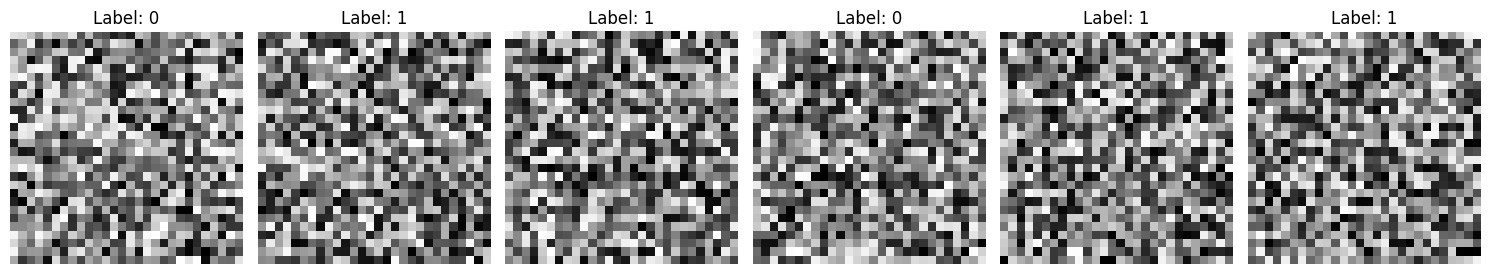

In [44]:
def show_fake_samples(dataset, num_samples=6):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        img, label = dataset[i]
        axes[i].imshow(img.squeeze(), cmap="gray")
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()

show_fake_samples(dataset)

In [45]:
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [46]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.network = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        return self.network(x)

In [47]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [48]:
epochs = 20
for epoch in range(epochs):
    total_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Metrics
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss:.4f} | Accuracy: {100 * correct / total:.2f}%")

Epoch 1/20 | Loss: 22.2609 | Accuracy: 49.40%
Epoch 2/20 | Loss: 22.2260 | Accuracy: 50.20%
Epoch 3/20 | Loss: 22.2120 | Accuracy: 50.20%
Epoch 4/20 | Loss: 22.1689 | Accuracy: 52.50%
Epoch 5/20 | Loss: 22.1203 | Accuracy: 51.70%
Epoch 6/20 | Loss: 22.1775 | Accuracy: 49.70%
Epoch 7/20 | Loss: 21.9891 | Accuracy: 59.20%
Epoch 8/20 | Loss: 21.7520 | Accuracy: 60.20%
Epoch 9/20 | Loss: 21.1145 | Accuracy: 66.90%
Epoch 10/20 | Loss: 19.9309 | Accuracy: 71.50%
Epoch 11/20 | Loss: 17.8358 | Accuracy: 77.00%
Epoch 12/20 | Loss: 15.4657 | Accuracy: 82.10%
Epoch 13/20 | Loss: 13.3190 | Accuracy: 83.80%
Epoch 14/20 | Loss: 11.3815 | Accuracy: 88.10%
Epoch 15/20 | Loss: 8.7236 | Accuracy: 92.00%
Epoch 16/20 | Loss: 7.4414 | Accuracy: 94.90%
Epoch 17/20 | Loss: 5.2679 | Accuracy: 96.70%
Epoch 18/20 | Loss: 4.2163 | Accuracy: 98.30%
Epoch 19/20 | Loss: 2.6837 | Accuracy: 99.70%
Epoch 20/20 | Loss: 1.9526 | Accuracy: 100.00%
